'C:\\Users\\Jeyashree\\Documents\\J\\POC\\poc_virtualenvironment'

In [43]:
import os
import sys
import numpy as np
sys.path.insert(1, './lib/python3.7/site-packages')
import googletrans
from googletrans import Translator
import matplotlib
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd
df = pd.read_csv("amazon.csv" ,  encoding = 'ISO-8859–1' , thousands = '.')
df.head()
df.shape
df.describe(include='all')
df.isna().sum()
df=df.replace(0 , np.nan)
df2 = df.dropna(subset = ['number'])
df2.describe(include= "all")
forest_fire_per_month = df2.groupby('month')['number'].sum()
#print(forest_fire_per_month)
months_unique = list(df2.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique , axis =0) 
#print(forest_fire_per_month)
forest_fire_per_month = forest_fire_per_month.to_frame()
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month.head()
googletrans


translator = Translator()
for month in months_unique: 
    detected = translator.detect(month)     
    translated = translator.translate(month)     
    #print(detected)     
    #print(translated)     
    #print("...")
    
translator2 = Translator()
for i, m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)  
    month1 = translated.text    
    forest_fire_per_month.at[i, 'month'] = month1
print(forest_fire_per_month)
 


        month     number
0     Janeiro    52587.0
1    February    30952.0
2       March    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

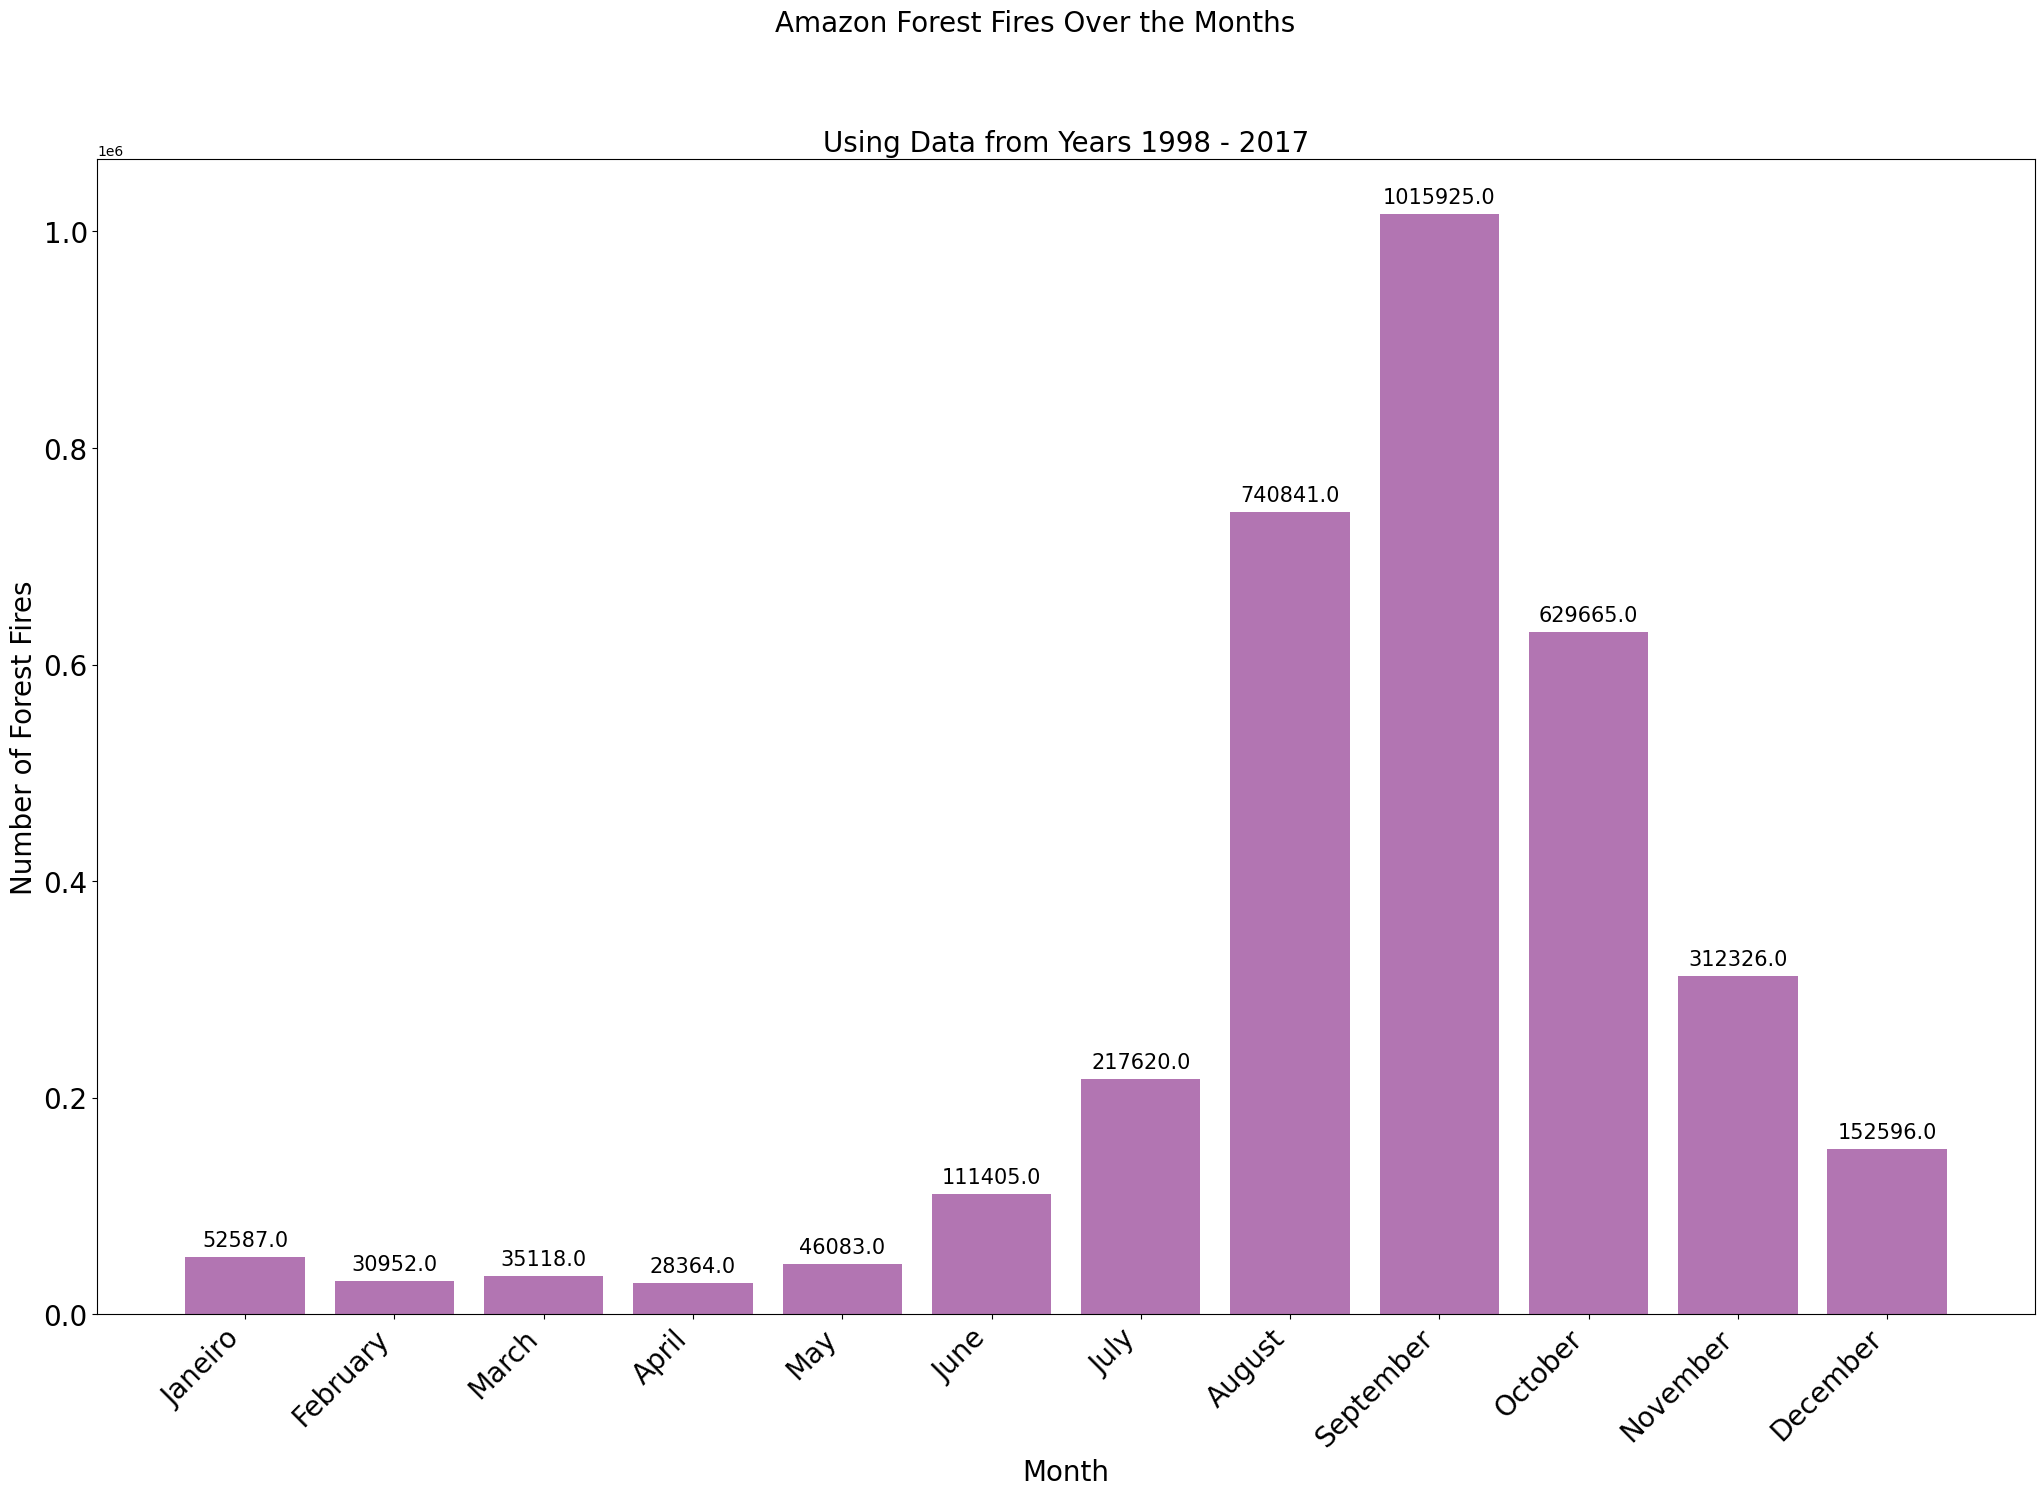

In [46]:
plt.figure(figsize=(25, 15)) #specify width and height 
#plt.bar(x-values, y-values) 
plt.bar(forest_fire_per_month['month'],forest_fire_per_month['number'], color = (0.5,0.1,0.5,0.6)) 
#use .suptitle for the actual title and .title for the subheading
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
plt.title('Using Data from Years 1998 - 2017', fontsize=20)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)   

plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)